In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

## 1. Data Preprocessing & Exploratory Data Analysis

In [150]:
customer_df = pd.read_csv('Data/Customer.csv')
transaction_df = pd.read_csv('Data/Transactions.csv')
cat_info_df = pd.read_csv('Data/prod_cat_info.csv')

In [151]:
# customer 데이터프레임은 5647개의 행, 4차원으로 이루어져 있습니다.
print(customer_df.shape)
customer_df.tail()

(5647, 4)


,customer_Id,DOB,Gender,city_code
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0
5646,274308,29-12-1992,F,5.0


In [152]:
# 생년월일이 object입니다. 날짜형식으로 바꿔보겠습니다.
# 또한 2개의 행에 성별, 거주지 코드가 없습니다. 확인해보겠습니다.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [153]:
customer_df['DOB'] = pd.to_datetime(customer_df['DOB'], format='%d-%m-%Y')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [154]:
# Gender, City_code가 동시에 빈게 아니라, 하나씩만 비어있네요.
customer_df[(customer_df['Gender'].isna()) | (customer_df['city_code'].isna())]

,customer_Id,DOB,Gender,city_code
24,267199,1970-02-14,NaN,2.0
87,271626,1970-06-02,NaN,6.0
115,268447,1970-07-14,M,NaN
149,268709,1970-09-09,F,NaN


In [155]:
# 고객 생년월일 중 가장 나이가 많은 사람은 1972년생, 적은 사람은 1992년생입니다. 
print(min(customer_df['DOB']), max(customer_df['DOB']))

1970-01-02 00:00:00 1992-12-29 00:00:00


In [156]:
# 시군구 코드는 총 10개가 있습니다.
city_code_list = customer_df['city_code'].unique().tolist()
city_code_list.sort()
city_code_list

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

In [157]:
# transcation 데이터프레임은 23053개 행, 10개 차원으로 이루어져 있습니다.
print(transaction_df.shape)
transaction_df.tail()

(23053, 10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop


In [158]:
# 결측치는 없고, 정수형 6개, 실수형 2개, object 2개로 이루어져 있습니다. 다만 trandate는 날짜라, 형식을 좀 바꿔줄 필요가 있습니다.
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [159]:
# 거래일자 형식을 바꾼 다음, 가장 처음 거래일, 마지막 거래일을 보겠습니다. -> 포맷이 다르네요...?

transaction_df['tran_date'] = pd.to_datetime(transaction_df['tran_date'])
print(min(transaction_df['tran_date']))
print(max(transaction_df['tran_date']))

ValueError: time data "12/2/2014" doesn't match format "%d-%m-%Y", at position 14. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [160]:
# 포맷이 안맞는 날짜를 포맷을 맞춰주는 코드를 짜고, apply해보겠습니다.

def validate_date_format(date_str):
    try:
        pd.to_datetime(date_str, format='%d-%m-%Y')
        return True
    except ValueError:
        return False

def convert_date_format(date_str):
    if not validate_date_format(date_str):
        return pd.to_datetime(date_str, dayfirst=True)
    else:
        return pd.to_datetime(date_str, format='%d-%m-%Y')

transaction_df['tran_date'] = transaction_df['tran_date'].apply(convert_date_format)

In [161]:
# 형식이 바뀌었습니다.
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [162]:
# 카테고리 정보 데이터프레임은 23개 행, 4개 차원이 있습니다.
print(cat_info_df.shape)
cat_info_df.tail()

(23, 4)


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
18,5,Books,6,DIY
19,6,Home and kitchen,2,Furnishing
20,6,Home and kitchen,10,Kitchen
21,6,Home and kitchen,11,Bath
22,6,Home and kitchen,12,Tools


In [163]:
cat_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


### 1-1. 2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별(Gender), 연령 구간별로 고객 수를 Python 코드를 이용하여 집계해주세요.  
### (단, 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외해주세요.)

### 1-2. 위에서 집계한 데이터를 기준으로 연령/성별 통계를 확인할 수 있는 데이터 시각화 자료를 작성해주세요.

In [164]:
# 성별 데이터가 nan이었던 데이터는 이 부분에서 제외해 주겠습니다.
new_customer_df = customer_df[customer_df['Gender'].notna()]
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5645 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5645 non-null   int64         
 1   DOB          5645 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 220.5+ KB


In [165]:
# 생년월일에서 기준년도를 빼서 age라는 행을 만들어보겠습니다.

new_customer_df['age'] = 2011 - new_customer_df['DOB'].dt.year
new_customer_df

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,41
1,269696,1970-01-07,F,8.0,41
2,268159,1970-01-08,F,8.0,41
3,270181,1970-01-10,F,2.0,41
4,268073,1970-01-11,M,1.0,41
...,...,...,...,...,...
5642,274474,1992-12-19,M,2.0,19
5643,267666,1992-12-24,M,6.0,19
5644,270476,1992-12-25,F,3.0,19
5645,269626,1992-12-27,F,5.0,19


In [166]:
# 이 age 행을 기준으로, 연령 구간을 나눠보겠습니다.
bins = [15, 20, 25, 30, 35, 40, 45]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44']
new_customer_df['age_group'] = pd.cut(new_customer_df['age'], bins=bins, labels=labels, right=False)
new_customer_df

,customer_Id,DOB,Gender,city_code,age,age_group
0,268408,1970-01-02,M,4.0,41,40-44
1,269696,1970-01-07,F,8.0,41,40-44
2,268159,1970-01-08,F,8.0,41,40-44
3,270181,1970-01-10,F,2.0,41,40-44
4,268073,1970-01-11,M,1.0,41,40-44
...,...,...,...,...,...,...
5642,274474,1992-12-19,M,2.0,19,15-19
5643,267666,1992-12-24,M,6.0,19,15-19
5644,270476,1992-12-25,F,3.0,19,15-19
5645,269626,1992-12-27,F,5.0,19,15-19


In [167]:
# 성별 별 고객 수, 연령 구간별 고객수를 구해보겠습니다.
gender_counts = new_customer_df['Gender'].value_counts()
gender_counts

Gender
M    2892
F    2753
Name: count, dtype: int64

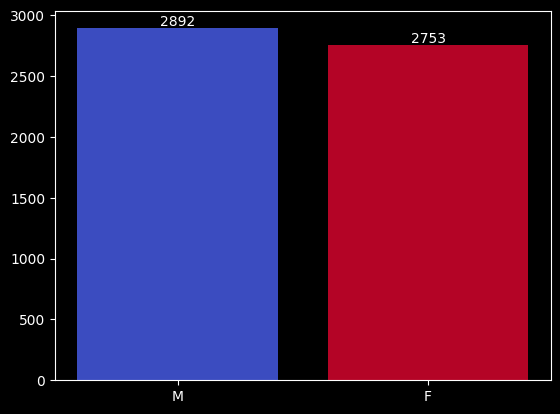

In [168]:
# 시각화 해보겠습니다.

cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0, 1, len(gender_counts)))

bars = plt.bar(gender_counts.index, gender_counts, color=colors)

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom')

plt.show()

In [169]:
# 이번엔 연령 구간별 고객수를 구해보겠습니다.
age_group_counts = new_customer_df['age_group'].value_counts().sort_index()
age_group_counts

age_group
15-19     261
20-24    1251
25-29    1198
30-34    1240
35-39    1222
40-44     473
Name: count, dtype: int64

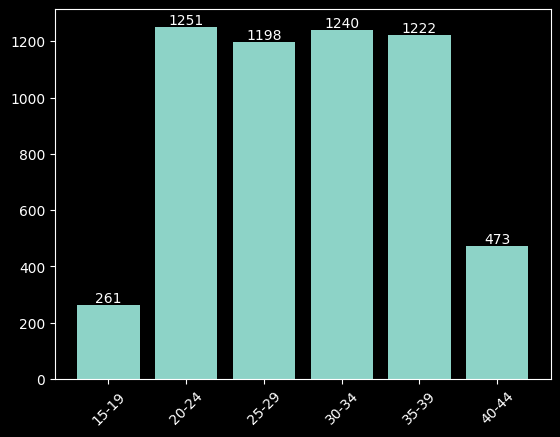

In [170]:
# 시각화 해보겠습니다. 20 ~ 39세 까지 많고, 10대랑 40대는 별로 사람이 없는 것을 확인할 수 있습니다.
bars = plt.bar(age_group_counts.index, age_group_counts)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

### 1-3. 2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기를 구해주세요.
#### - 구매 경과일수 = 기준일 - 마지막 구매일
#### - 구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매일 수 - 1)

### 1-4. 위에서 구한 결과에 고객의 연령, 연령 구간, 성별 정보를 결합하여 특정 연령 구간, 성별 간 차이가 있는지 확인해주세요.

In [171]:
# transaction 데이터프레임에서 마지막 거래일을 봐야합니다. cust_id 별로 groupby한 다음 마지막 거래일을 살펴보겠습니다.
# 다만 마지막 거래일이 2013-02-28전까지로 한정해서 자르겠습니다. 마지막 구매 경과일수가 -가 되는 것을 방지하기 위해서입니다.

filtered_t_df = transaction_df[transaction_df['tran_date'] < pd.to_datetime('2013-02-28')]

# 필터링된 데이터를 사용하여 고객별 마지막 거래일 계산
last_transaction_dates = filtered_t_df.groupby('cust_id')['tran_date'].max()
last_transaction_dates

cust_id
266783   2013-02-20
266784   2012-12-04
266785   2013-02-13
266788   2013-02-12
266794   2012-11-27
            ...    
275257   2013-02-26
275261   2011-10-05
275262   2012-02-29
275264   2011-10-08
275265   2011-12-26
Name: tran_date, Length: 5189, dtype: datetime64[ns]

In [172]:
# 고객별 마지막 거래일과 기준일로 구매 경과일수를 위에서 시각화했던 new_customer_df에 추가하겠습니다.
reference_date = pd.to_datetime('2013-02-28')

days_since_purchase = reference_date - last_transaction_dates

days_since_purchase_days = days_since_purchase.dt.days

days_since_df = days_since_purchase_days.reset_index()
days_since_df.columns = ['customer_Id', 'Days Since Purchase']

new_customer_df = new_customer_df.merge(days_since_df, on='customer_Id')
new_customer_df

,customer_Id,DOB,Gender,city_code,age,age_group,Days Since Purchase
0,268408,1970-01-02,M,4.0,41,40-44,29
1,269696,1970-01-07,F,8.0,41,40-44,319
2,268159,1970-01-08,F,8.0,41,40-44,29
3,270181,1970-01-10,F,2.0,41,40-44,64
4,268073,1970-01-11,M,1.0,41,40-44,467
...,...,...,...,...,...,...,...
5182,274474,1992-12-19,M,2.0,19,15-19,547
5183,267666,1992-12-24,M,6.0,19,15-19,106
5184,270476,1992-12-25,F,3.0,19,15-19,282
5185,269626,1992-12-27,F,5.0,19,15-19,499


In [173]:
# 이번엔 구매 주기를 cust_id별로 구해주겠습니다.
first_transaction_dates = filtered_t_df.groupby('cust_id')['tran_date'].min()
transaction_counts = filtered_t_df.groupby('cust_id')['tran_date'].count()

purchase_cycle = (last_transaction_dates - first_transaction_dates) / (transaction_counts - 1)

purchase_cycle_days = purchase_cycle.dt.days

purchase_cycle_df = purchase_cycle_days.reset_index()
purchase_cycle_df.columns = ['customer_Id', 'Purchase Cycle']

new_customer_df = new_customer_df.merge(purchase_cycle_df, on='customer_Id')
new_customer_df


,customer_Id,DOB,Gender,city_code,age,age_group,Days Since Purchase,Purchase Cycle
0,268408,1970-01-02,M,4.0,41,40-44,29,113.0
1,269696,1970-01-07,F,8.0,41,40-44,319,105.0
2,268159,1970-01-08,F,8.0,41,40-44,29,119.0
3,270181,1970-01-10,F,2.0,41,40-44,64,129.0
4,268073,1970-01-11,M,1.0,41,40-44,467,NaN
...,...,...,...,...,...,...,...,...
5182,274474,1992-12-19,M,2.0,19,15-19,547,36.0
5183,267666,1992-12-24,M,6.0,19,15-19,106,194.0
5184,270476,1992-12-25,F,3.0,19,15-19,282,143.0
5185,269626,1992-12-27,F,5.0,19,15-19,499,103.0


In [175]:
# 구매 주기와 구매 경과일수가 성별, 연령구간에 차이가 있는지 확인해보겠습니다.

# 성별 별 구매 경과일 수 차이 -> 여성이 구매 경과일수가 살짝 더 낮지만, 유의미한 차이는 아닙니다.
gender_days_since_purchase = new_customer_df.groupby('Gender')['Days Since Purchase'].mean()
gender_days_since_purchase


Gender
F    239.923776
M    240.145763
Name: Days Since Purchase, dtype: float64

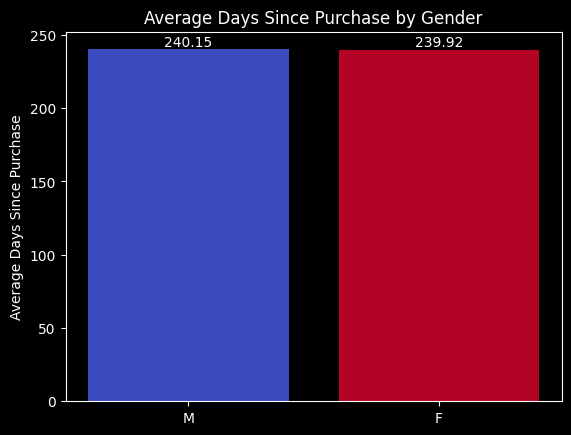

In [177]:
# 시각화해보겠습니다.
gender_days_since_purchase = new_customer_df.groupby('Gender')['Days Since Purchase'].mean().reindex(["M", "F"])

cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0, 1, len(gender_days_since_purchase)))

bars = plt.bar(gender_days_since_purchase.index, gender_days_since_purchase, color=colors)

plt.ylabel('Average Days Since Purchase')
plt.title('Average Days Since Purchase by Gender')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')

plt.show()

In [181]:
new_customer_df

,customer_Id,DOB,Gender,city_code,age,age_group,Days Since Purchase,Purchase Cycle
0,268408,1970-01-02,M,4.0,41,40-44,29,113.0
1,269696,1970-01-07,F,8.0,41,40-44,319,105.0
2,268159,1970-01-08,F,8.0,41,40-44,29,119.0
3,270181,1970-01-10,F,2.0,41,40-44,64,129.0
4,268073,1970-01-11,M,1.0,41,40-44,467,NaN
...,...,...,...,...,...,...,...,...
5182,274474,1992-12-19,M,2.0,19,15-19,547,36.0
5183,267666,1992-12-24,M,6.0,19,15-19,106,194.0
5184,270476,1992-12-25,F,3.0,19,15-19,282,143.0
5185,269626,1992-12-27,F,5.0,19,15-19,499,103.0


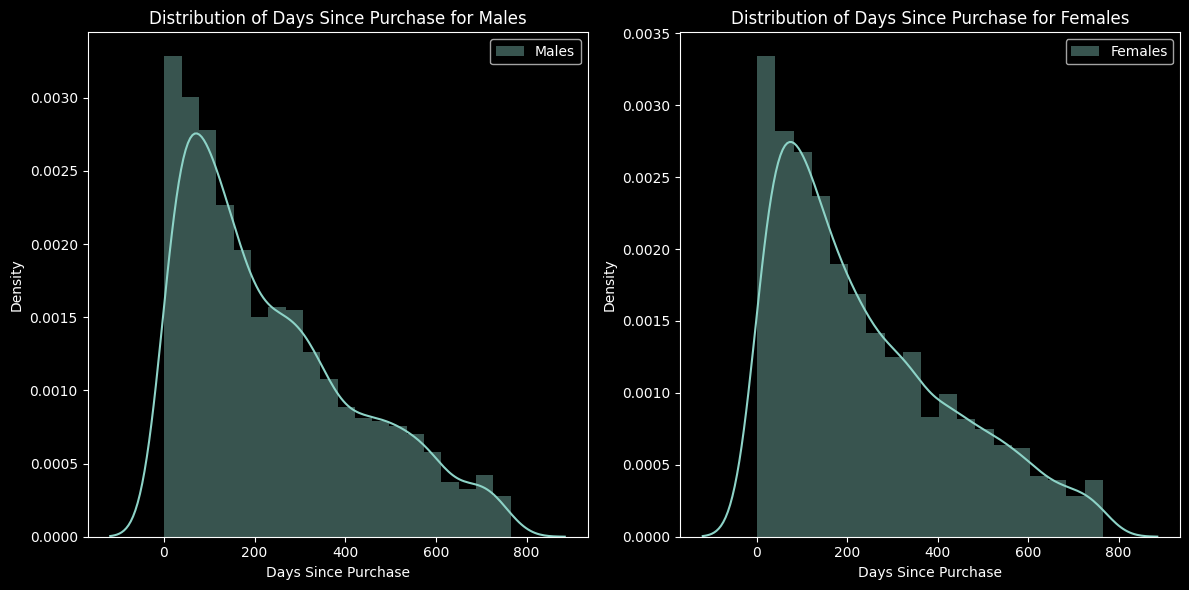

In [182]:
# 성별 별 구매경과일수 분포는 어떻게 될까요? -> 크게 차이나는 특정 구간이 있어보이지는 않습니다.
male_df = new_customer_df[new_customer_df['Gender'] == 'M']
female_df = new_customer_df[new_customer_df['Gender'] == 'F']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.distplot(male_df['Days Since Purchase'].dropna(), kde=True, label='Males')
plt.title('Distribution of Days Since Purchase for Males')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(female_df['Days Since Purchase'].dropna(), kde=True, label='Females')
plt.title('Distribution of Days Since Purchase for Females')
plt.legend()

plt.tight_layout()
plt.show()

In [178]:
# 이번엔 연령 구간별 구매 경과일수에 차이가 있는지 살펴보겠습니다. -> 의외로 40대 평균 구매 경과일수가 가장 작네요.
agegroup_days_since_purchase = new_customer_df.groupby('age_group')['Days Since Purchase'].mean()
agegroup_days_since_purchase


age_group
15-19    246.700855
20-24    244.211755
25-29    237.020702
30-34    240.441410
35-39    239.535842
40-44    233.271889
Name: Days Since Purchase, dtype: float64

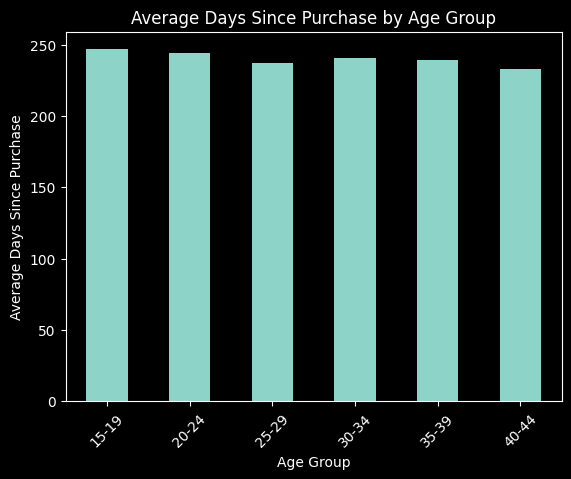

In [186]:
# 시각화하면 아래와 같습니다.
agegroup_days_since_purchase.plot(kind='bar')

plt.title('Average Days Since Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Days Since Purchase')

plt.xticks(rotation=45)
plt.show()

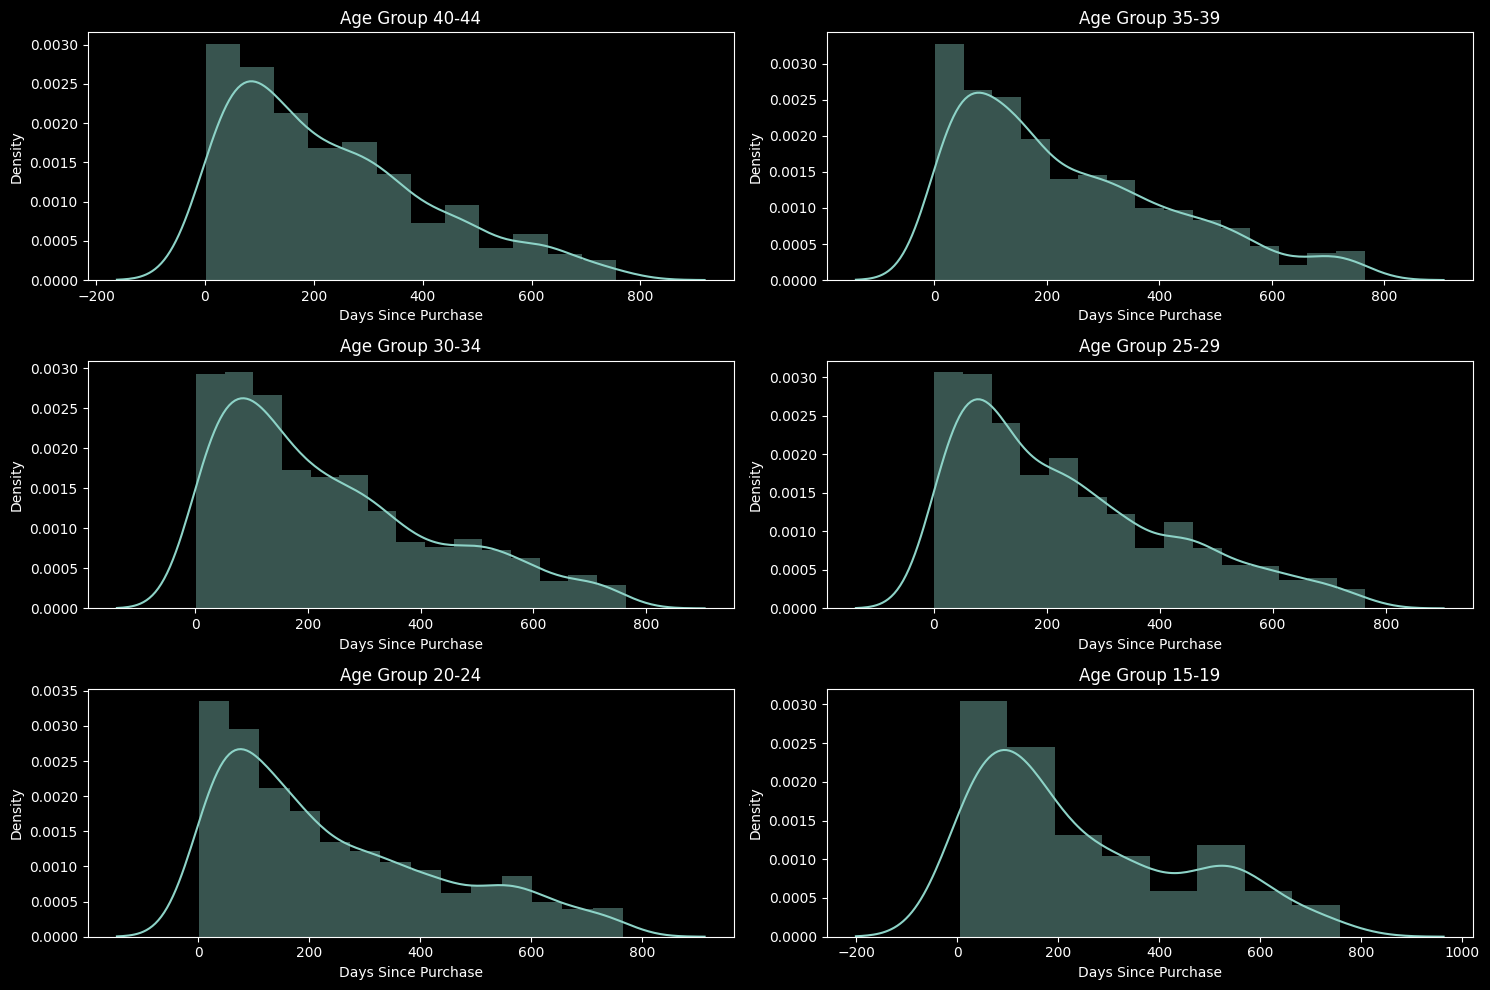

In [187]:
# 이번엔 연령 구간별로 구매 경과일수 분포 차이가 있는지 distplot으로 시각화해보겠습니다.

plt.figure(figsize=(15, 10))
for i, age_group in enumerate(new_customer_df['age_group'].unique()):
    plt.subplot(3, 2, i+1) 
    sns.distplot(new_customer_df[new_customer_df['age_group'] == age_group]['Days Since Purchase'], kde=True)
    plt.title(f'Age Group {age_group}')
    plt.xlabel('Days Since Purchase')
    plt.tight_layout()

# 그래프 표시
plt.show()

In [188]:
# 이번엔 연령 구간, 성별 별 구매주기 차이를 구해보겠습니다.
# 성별 별 평균 구매 주기 차이 -> 남성이 구매 주기가 살짝 더 낮지만, 역시 유의미한 차이는 아닙니다.
gender_purchase_cycle = new_customer_df.groupby('Gender')['Purchase Cycle'].mean()
gender_purchase_cycle

Gender
F    168.198194
M    167.801144
Name: Purchase Cycle, dtype: float64

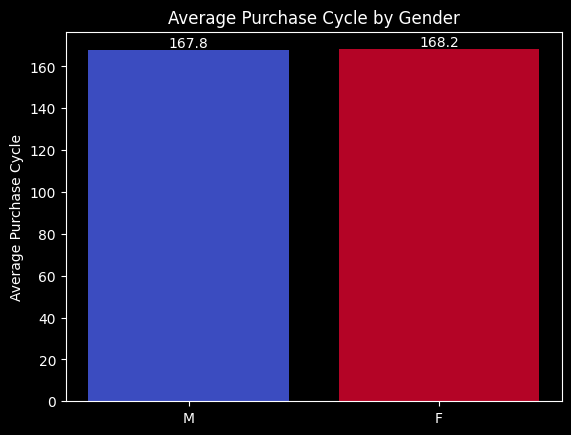

In [190]:
# 시각화해보겠습니다.
gender_purchase_cycle = new_customer_df.groupby('Gender')['Purchase Cycle'].mean().reindex(["M", "F"])

cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0, 1, len(gender_purchase_cycle)))

bars = plt.bar(gender_purchase_cycle.index, gender_purchase_cycle, color=colors)

plt.ylabel('Average Purchase Cycle')
plt.title('Average Purchase Cycle by Gender')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')

plt.show()

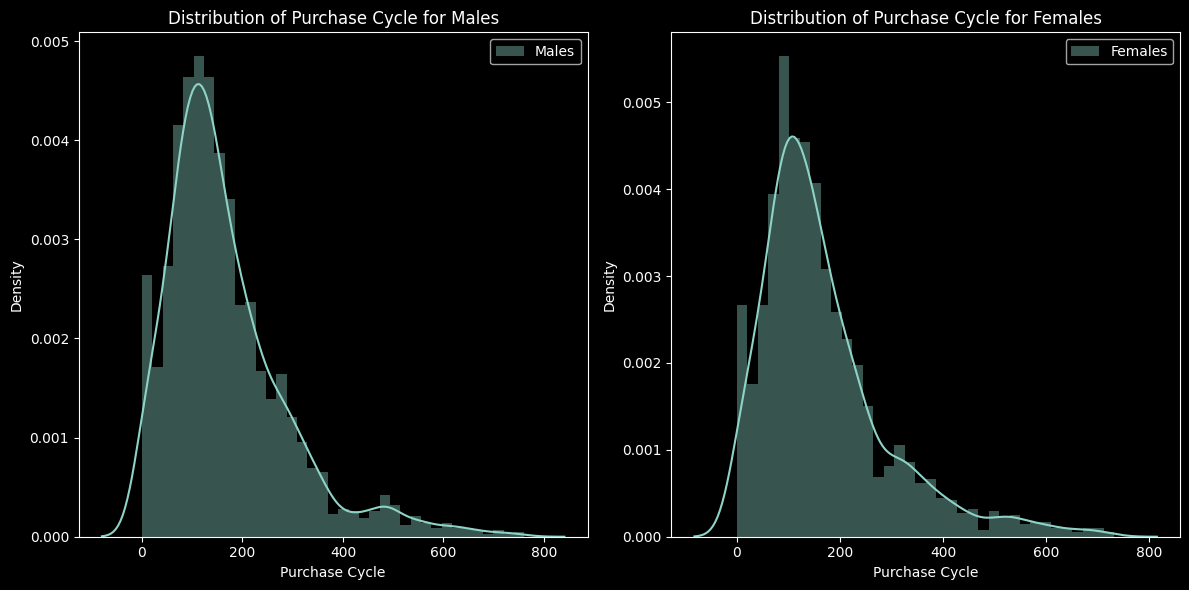

In [192]:
# 성별 별 구매주기 분포차이는 어떻게 될까요? 시각화해보겠습니다.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.distplot(male_df['Purchase Cycle'].dropna(), kde=True, label='Males')
plt.title('Distribution of Purchase Cycle for Males')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(female_df['Purchase Cycle'].dropna(), kde=True, label='Females')
plt.title('Distribution of Purchase Cycle for Females')
plt.legend()

plt.tight_layout()
plt.show()

In [195]:
# 이번엔 연령 구간별 구매 주기에 차이가 있는지 살펴보겠습니다. -> 구매 경과일수가 짧았던 40대가 오히려 구매 주기는 더 긴 것을 확인할 수 있습니다.
agegroup_purchase_cycle = new_customer_df.groupby('age_group')['Purchase Cycle'].mean()
agegroup_purchase_cycle 

age_group
15-19    158.852041
20-24    156.234899
25-29    176.018349
30-34    168.103911
35-39    167.792325
40-44    183.527378
Name: Purchase Cycle, dtype: float64

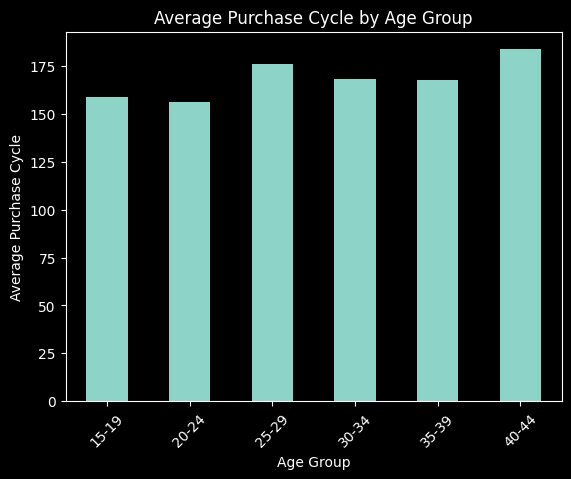

In [197]:
# 시각화하면 아래와 같습니다.
agegroup_purchase_cycle.plot(kind='bar')

plt.title('Average Purchase Cycle by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Cycle')

plt.xticks(rotation=45)
plt.show()

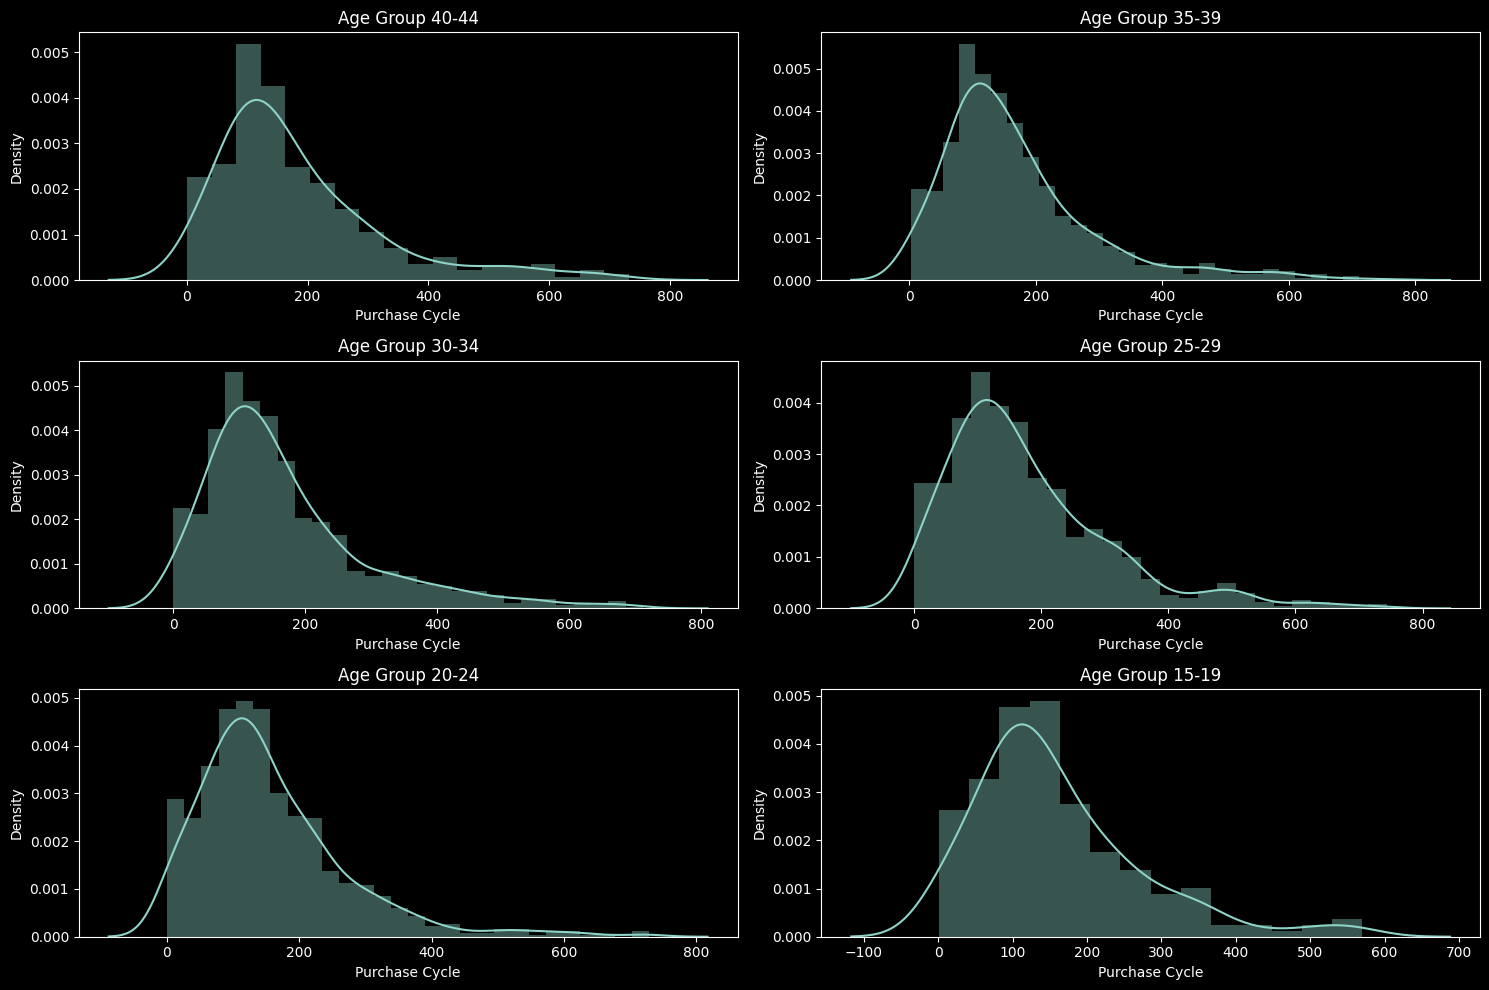

In [198]:
# 이번엔 연령 구간별로 구매 주기 분포 차이가 있는지 distplot으로 시각화해보겠습니다.

plt.figure(figsize=(15, 10))
for i, age_group in enumerate(new_customer_df['age_group'].unique()):
    plt.subplot(3, 2, i+1) 
    sns.distplot(new_customer_df[new_customer_df['age_group'] == age_group]['Purchase Cycle'], kde=True)
    plt.title(f'Age Group {age_group}')
    plt.xlabel('Purchase Cycle')
    plt.tight_layout()

# 그래프 표시
plt.show()

### 1-5. 위에서 구한 고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 
### 재구매 유도를 위한 캠페인을 진행하였다고 가정하겠습니다. 캠페인 2013년 12월 31일까지 구매반응한 고객 수를 구해주세요. 

In [244]:
D_P_over_30days = new_customer_df[new_customer_df['Days Since Purchase'] >= 30]
customer_ids = D_P_over_30days['customer_Id']

start_date = pd.to_datetime(reference_date) # reference_date는 2013-02-28
end_date = pd.to_datetime('2013-12-31')

filtered_transactions = transaction_df[
    (transaction_df['cust_id'].isin(customer_ids)) &
    (transaction_df['tran_date'] >= start_date) & 
    (transaction_df['tran_date'] <= end_date)
]

response_customers_count = filtered_transactions['cust_id'].nunique()

print(f"구매 반응한 고객 수: {response_customers_count}")

구매 반응한 고객 수: 2990


### 1-6. 전체 데이터에서 고객의 요일별 구매건수 차이가 있는지 확인해주세요.

In [201]:
transaction_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop


In [204]:
# 요일을 day of week라고 해서 계산해보겠습니다. -> 금요일이 가장 많고, 월요일이 가장 적었네요. 다만 구매건수가 그렇게까지 크게 차이나지는 않는 것 같습니다.

transaction_df['tran_date'] = pd.to_datetime(transaction_df['tran_date'], format='%d-%m-%Y')

transaction_df['day_of_week'] = transaction_df['tran_date'].dt.day_name()

weekday_counts = transaction_df.groupby('day_of_week').size()

weekday_counts

day_of_week
Friday       3361
Monday       3219
Saturday     3258
Sunday       3326
Thursday     3318
Tuesday      3269
Wednesday    3302
dtype: int64

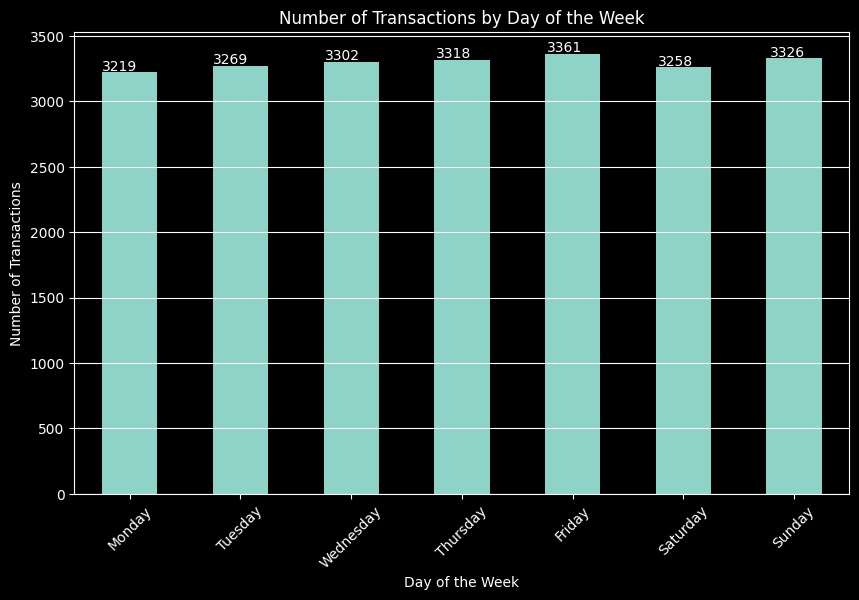

In [206]:
# 시각화해보겠습니다. 
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts = weekday_counts.reindex(ordered_days)

# Re-plotting the graph with the correct order of days and adding numbers on top of the bars
plt.figure(figsize=(10, 6))
ax = weekday_counts.plot(kind='bar')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding the numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

### 1-7. 대 카테고리를 기준으로 2011년부터 2013년 월평균 매출액이 가장 높은 카테고리는 무엇인가요?

In [207]:
# 카테고리 데이터프레임은 아래와 같습니다. 
cat_info_df

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [208]:
# 거래 내역에 보면 음수로 된 데이터도 존재하는데, 아마 반품으로 보입니다.
transaction_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,day_of_week
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Friday
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Thursday
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Monday
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Monday
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday


In [209]:
# 거래일이 2011-01-01부터 2013-12-31인 데이터만 필터링 해보겠습니다.
new_transaction_df = transaction_df[(transaction_df['tran_date'] >= '2011-01-01') & (transaction_df['tran_date'] <= '2013-12-31')]
new_transaction_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,day_of_week
1065,58387181112,275068,2013-12-31,8,3,5,792,415.800,4375.800,e-Shop,Tuesday
1066,21300411973,274568,2013-12-31,2,6,1,1054,110.670,1164.670,Flagship store,Tuesday
1067,25511948871,273541,2013-12-31,3,1,-3,-253,79.695,-838.695,MBR,Tuesday
1068,45524941068,268722,2013-12-31,10,5,5,124,65.100,685.100,Flagship store,Tuesday
1069,26100869804,273836,2013-12-31,9,3,3,843,265.545,2794.545,e-Shop,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday


In [231]:
# 여기서 category별로 Groupby한 다음, 월 평균 매출액과 월 평균 매출액의 전체 평균을 한번 구해보겠습니다.(위에서 필터링 한 것처럼 2011~2013까지입니다.)

new_transaction_df['month'] = new_transaction_df['tran_date'].dt.month
monthly_avg_sales = new_transaction_df.groupby(['prod_cat_code', 'month'])['total_amt'].mean().reset_index()

category_total_avg = new_transaction_df.groupby('prod_cat_code')['total_amt'].mean().reset_index()

monthly_avg_sales = pd.merge(monthly_avg_sales, category_total_avg, on='prod_cat_code', suffixes=('_monthly', '_monthly_mean'))

monthly_avg_sales = pd.merge(monthly_avg_sales, cat_info_df, on='prod_cat_code', how='left')

monthly_avg_sales = monthly_avg_sales[['prod_cat', 'month', 'total_amt_monthly', 'total_amt_monthly_mean']]

monthly_avg_sales.drop_duplicates(inplace=True)

monthly_avg_sales

,prod_cat,month,total_amt_monthly,total_amt_monthly_mean
0,Clothing,1,2080.952634,2122.940770
3,Clothing,2,2029.576179,2122.940770
6,Clothing,3,2429.696445,2122.940770
9,Clothing,4,2306.831150,2122.940770
12,Clothing,5,1807.971051,2122.940770
...,...,...,...,...
256,Home and kitchen,8,1879.671168,2043.419213
260,Home and kitchen,9,1965.224083,2043.419213
264,Home and kitchen,10,2247.981006,2043.419213
268,Home and kitchen,11,2101.893057,2043.419213


In [235]:
# 카테고리 별로는 가전용품이 월별 매출이 제일 낮고, 전자제품이 제일 높습니다.

total = monthly_avg_sales[['prod_cat', 'total_amt_monthly_mean']]

total.drop_duplicates(inplace=True)

total.reset_index(drop=True, inplace=True)

total

,prod_cat,total_amt_monthly_mean
0,Clothing,2122.940770
1,Footwear,2073.147459
2,Electronics,2180.823623
3,Bags,2054.569312
4,Books,2119.423682
5,Home and kitchen,2043.419213


### 1-8. 각 카테고리별 월 평균 매출액의 분산과 표준편차를 구해주세요.

In [242]:
'''
각 카테고리 별 월 평균 매출액 분산 및 표준편차를 구해보겠습니다.
옷의 월 평균 매출액 분산 및 표준편차가 가장 높고, 전자제품이 제일 낮습니다.
옷이 분산 및 표준편차가 높은 이유는 각 계절이 시작되기 직전 시즌에 옷을 사는 경우가 많고,
반면 전자제품은 계절의 영향을 받지 않고 필요시에 사는 것으로 보입니다. 
에어컨 같은 경우는 세부 카테고리에 없긴 한데, 이런건 계절 영향 받을 것 같은데 궁금하네요.
마지막 변동계수를 구하기위해, 월 평균 매출액의 평균도 더해주겠습니다.
'''

cats = total['prod_cat'].unique().tolist()

var, std = [], []

for cat in cats:
    m = monthly_avg_sales[monthly_avg_sales['prod_cat'] == cat]
    var.append(m['total_amt_monthly'].var())
    std.append(m['total_amt_monthly'].std())

stats_df = pd.DataFrame({
    'prod_cat': cats,
    'Variance': var,
    'Standard Deviation': std,
    'total_amt_monthly_mean' : total['total_amt_monthly_mean']
})

stats_df

,prod_cat,Variance,Standard Deviation,total_amt_monthly_mean
0,Clothing,39238.079986,198.086042,2122.940770
1,Footwear,18115.846891,134.595122,2073.147459
2,Electronics,6432.179528,80.200870,2180.823623
3,Bags,10012.370272,100.061832,2054.569312
4,Books,12391.632498,111.317710,2119.423682
5,Home and kitchen,25180.393270,158.683311,2043.419213


### 1-9. 각 카테고리에 대한 월평균 매출액과 표준편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단해주세요.

In [243]:
'''
변동계수는 표준편차 / 평균입니다.
위 데이터프레임에 변동계수를 더해서 살펴보겠습니다.
전자제품의 경우 변동계수가 가장 낮으며, 월 평균 수익 평균도 높아 안정적으로 수익이 창출됨을 확인할 수 있습니다.
반면 매출이 가장 낮고 변동계수가 카테고리 중 2번째로 높은 Home and Kitchen의 경우 높은 변동성으로 비즈니스 계획 및 재고관리가 어려우며
또한 낮은 매출은 성장 잠재력이 크지 않음을 시사합니다.
의류의 경우 매출의 변동성은 가장 크지만 수익 평균이 2번째로 높은데, 이는 매출을 더 올릴 수 있는 기회일 수도 있지만 위험성도 큽니다.
매출이 높은 시기에는 큰 수익을 올릴 수 있지만 변동성이 크기 때문에 예측이 어렵고 시장 변화에 민감할 수 있습니다.
'''

stats_df['Coefficient of variation'] = stats_df['Standard Deviation'] / stats_df['total_amt_monthly_mean']
stats_df

,prod_cat,Variance,Standard Deviation,total_amt_monthly_mean,Coefficient of variation
0,Clothing,39238.079986,198.086042,2122.940770,0.093307
1,Footwear,18115.846891,134.595122,2073.147459,0.064923
2,Electronics,6432.179528,80.200870,2180.823623,0.036775
3,Bags,10012.370272,100.061832,2054.569312,0.048702
4,Books,12391.632498,111.317710,2119.423682,0.052523
5,Home and kitchen,25180.393270,158.683311,2043.419213,0.077656


## 2. Interpretation & Hypothesis

### 2-1. 다음의 2가지 문제 중 하나를 선택하여, 가설을 수립하고 데이터 탐색 후 비즈니스 문제를 정의해보세요. 
### 그리고 정의된 문제를 개선하기 위한 아이디어 또는 방안을 제시해주세요.
### - 주제 1. 매출 관점에서 카테고리별 매출 성장 방안
### - 주제 2. 고객 관점에서 구매활동성 증대 방안

In [250]:
'''
저는 주제 2의 관점에서, 위에서 2013년 2월 28일에 30일 이상 구매 경과일이 지난 고객을 대상으로 캠페인을 했다는 가정을 하고 아래와 같은 가설을 세워보았습니다.

가설 : 캠페인을 통해 유입된 고객은 평소 고객주기보다 물건을 더 빨리 구매했을 것이다. 즉, 캠페인을 통한 유입효과가 있었을 것이다. 

종속 변수 : 구매 간격 (캠페인 기간 중 거래일과 캠페인 기간 전 마지막 거래일 간의 일수 차이)을 구매 주기와 비교

독립 변수 : 캠페인 기간 중 상품 구매 여부(tran_date에 따라)

측정 인원 : Days Since Purchase가 30일 이상인 고객들 중 캠페인 기간에 물건을 구매한 인원(2,990명)

기준 기간 : 캠페인 기간 2013년 2월 28일부터 2013년 12월 31일까지
'''

# 캠페인 기간 전 마지막 거래일 계산
last_purchase_before_campaign = transaction_df[
    (transaction_df['cust_id'].isin(customer_ids)) &
    (transaction_df['tran_date'] < start_date)
].groupby('cust_id')['tran_date'].max().reset_index()

# 캠페인 기간 중 거래일과 결합
campaign_purchases = pd.merge(filtered_transactions, last_purchase_before_campaign, on='cust_id', how='left')

# 거래 간격 계산 (캠페인 기간 중 거래일 - 캠페인 기간 전 마지막 거래일)
campaign_purchases['purchase_interval'] = (campaign_purchases['tran_date_x'] - campaign_purchases['tran_date_y']).dt.days

# 고객 정보와 결합
campaign_purchases = pd.merge(campaign_purchases, new_customer_df, left_on='cust_id', right_on='customer_Id')

# 캠페인 효과 분석 (구매 주기보다 거래 간격이 짧은 경우)
campaign_effect = campaign_purchases[campaign_purchases['purchase_interval'] < campaign_purchases['Purchase Cycle']]

# 캠페인 효과가 있는 고객 수 계산
campaign_effect_customers_count = campaign_effect['customer_Id'].nunique()

print(f"캠페인 효과가 있는 고객 수: {campaign_effect_customers_count}")


캠페인 효과가 있는 고객 수: 475


In [ ]:
''' 
2,990명 중 캠페인 효과가 있는 고객수가 475명(15.9%)라고 집계됩니다. 효과가 미미하다고 볼 수 있는데요. 
이렇게 캠페인 효과를 검증하는 데에는 여러 문제가 있습니다.

1. 단순히 구매주기보다 더 빨리 구매했다고 해서 캠페인 효과가 있다고 볼 수는 없습니다.
Home And Kitchen같은 생필품의 경우는 갑자기 떨어져서 구매했을 수도 있고, 전자제품은 고장이 나서 구매했을 수도 있습니다.
이런 모든 변인을 통제하지 않고는 캠페인의 효과를 검증하기란 쉽지 않습니다.

2. 카테고리 별 구매 주기가 아래를 보시면 다릅니다. 그리고 연령별로도 아래에 보시면 주기가 다릅니다. 하지만 통상 150일 전후입니다.
이에 반해 캠페인의 시행 일수가 너무 깁니다. 너무 길어서 캠페인의 효과를 정확히 측정하기가 힘듭니다.
주기에 맞게 150일 이상 구매 경과일 수 고객에게 캠페인을 해서 효과를 계산한다면 의미가 있을 것입니다.
다만 캠페인 할 때 보내는 LMS나 카톡도 결국은 비용이므로, 종합적인 비용 고려를 하여 캠페인을 진행해야합니다.

# customer_df와 new_transaction_df를 cust_id를 기준으로 병합
merged_df = pd.merge(new_transaction_df, new_customer_df, left_on='cust_id', right_on='customer_Id')

# prod_cat_code 별로 그룹화하여 Purchase Cycle의 평균을 계산
average_purchase_cycle = merged_df.groupby('prod_cat_code')['Purchase Cycle'].mean()

prod_cat_code
1    156.448092
2    154.914970
3    155.790909
4    148.684823
5    153.866958
6    151.715755

age_group
15-19    158.852041
20-24    156.234899
25-29    176.018349
30-34    168.103911
35-39    167.792325
40-44    183.527378


3. 대조군 설정도 문제입니다. 캠페인 동안 대조군을 따로 설정하지 않은 것으로 보이는데, 
대조군 설정을 해야 비교 결과가 더 명확해집니다.

이에 따라, 현재 진행되는 캠페인 대신 구매유도를 더 확실히 하기 위한 캠페인을 진행하고, 해당 캠페인의 제대로 된 효과를 측정하기 위해서는 아래와 같은 방안이 필요합니다.

1. 카테고리별, 연령별 등 다양한 구매주기를 고려, 마지막 구매 경과일 수가 150일이 지난 인원 대상으로 캠페인을 진행
2. 대조군의 제대로 된 설정을 통해 캠페인의 효과 고려 필요(실험군에만 구매유도 문자를 보내고, 대조군은 안보낸 후 A/B 테스트 등)
3. 캠페인 기간 동안 1번만 구매하고 마는 체리피커 고객 파악 및 충성고객의 리텐션 파악을 위한 코호트 분석 필요
'''